In [47]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt



    
def perceptron(X,Y,lr=1,):
    
    # Add bias
    X = sklearn.preprocessing.add_dummy_feature(X)

    # get shape of input
    m,n = X.shape
    # initialize w randomly
    w = np.random.random(n)
    # get the missed elements
    miss = eval_output(X,w,Y)
    while len(miss)>0:
        # evaluate gradient
        delta_w = np.dot((Y[miss]-np.sign(np.dot(X[miss],w))),X[miss])/len(miss)
        # update weights
        w = w+lr*delta_w
        # evaluate new misses
        miss=eval_output(X,w,Y)
    return w


def eval_output(X,W,Y):
    predicted = np.dot(X,W)
    ret = True
    miss = np.where(Y*predicted<=0)[0]
    n = len(miss)
    
    return miss



In [48]:
path_ad='../intro//ds_adolescenti.csv'
path_at='../intro//ds_atleti.csv'

ds_adolscenti = pd.read_csv(path_ad,delimiter=';',header=None)
ds_atleti = pd.read_csv(path_at,delimiter=';',header=None)

i1 = ds_adolscenti[ds_adolscenti[1]<69]
i2 = ds_atleti[ds_atleti[1]>71]
frames = [i1,i2]
ds_tot=pd.concat(frames)

ds_tot=sklearn.preprocessing.minmax_scale(ds_tot)



In [49]:
n1 = i1.shape[0]
n2 = i2.shape[0]
y = np.block([np.ones(n1),-1*np.ones(n2)])

In [56]:
%time
w = perceptron(ds_tot,y,lr=1)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.15 µs


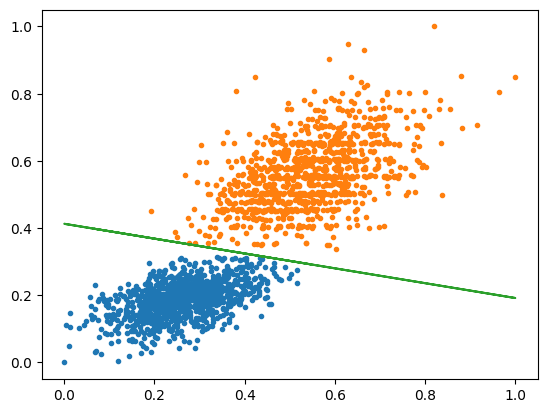

In [51]:
i = y==1
j = y==-1
wp0 = -w[1]/w[2]
wp1 = -w[0]/w[2]
plt.plot(ds_tot[i,0],ds_tot[i,1],'.',ds_tot[j,0],ds_tot[j,1],'.',ds_tot[:,0],wp0*ds_tot[:,0]+wp1,'-')

In [ ]:
def plot_hyperplane(w,X,Y,seq):
    XX=X[:,1:3]
    i = Y==1
    j = Y==-1
    wp0 = -w[1]/w[2]
    wp1 = -w[0]/w[2]
    plt.plot(XX[i,0],XX[i,1],'.',XX[j,0],XX[j,1],'.',XX[:,0],wp0*XX[:,0]+wp1,'-')
    plt.savefig('./imgs/fig'+str(seq)+'.png')
    plt.close()